In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import PIL.Image
from PIL import  Image

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from keras.utils import to_categorical

In [4]:
train = pd.read_csv('sign-language-mnist/sign_mnist_train.csv')
test = pd.read_csv('sign-language-mnist/sign_mnist_test.csv')

In [5]:
print(train.head())
print(train.shape)

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9    ...     pixel775  pixel776  pixel777  pixel778  pixel779  \
0     153    ...          207       207       207       207       206   
1     158    ...           69       149       128        87        94   
2     187    ...          202       201       200       199       198   
3     210    ...          235       234       233       231       230   
4     185    ...           92       105       105       108       133   

   pixel780  pixel781  pixel782  pixel783  pixel784  
0       206       206       204       203       20

In [6]:
labels = train['label'].values

In [7]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [8]:
train.drop('label',axis=1,inplace=True)

In [9]:
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])


In [10]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
labels = label_bin.fit_transform(labels)

In [11]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [12]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [13]:
x_train = x_train/255
x_test = x_test/255

In [14]:
#Reshaping the training and validation sets
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

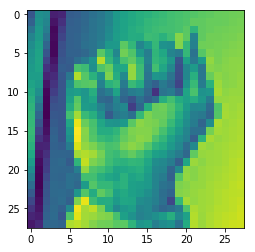

In [15]:
plt.imshow(x_train[0].reshape(28,28))

In [16]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

In [17]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third  convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [18]:
# Step 3 - Flattening
classifier.add(Flatten())

In [19]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(24 , activation = 'softmax'))


In [20]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
history = classifier.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=50, batch_size=128)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 34s 2ms/step - loss: 2.8510 - acc: 0.1308 - val_loss: 2.1431 - val_acc: 0.3283
Epoch 2/50
19218/19218 [==============================] - 32s 2ms/step - loss: 1.7553 - acc: 0.4193 - val_loss: 1.2665 - val_acc: 0.6013
Epoch 3/50
19218/19218 [==============================] - 32s 2ms/step - loss: 1.1815 - acc: 0.5969 - val_loss: 0.8989 - val_acc: 0.7034
Epoch 4/50
19218/19218 [==============================] - 32s 2ms/step - loss: 0.8923 - acc: 0.6905 - val_loss: 0.6851 - val_acc: 0.7703
Epoch 5/50
19218/19218 [==============================] - 32s 2ms/step - loss: 0.7127 - acc: 0.7509 - val_loss: 0.5417 - val_acc: 0.8230
Epoch 6/50
19218/19218 [==============================] - 32s 2ms/step - loss: 0.5790 - acc: 0.7982 - val_loss: 0.4384 - val_acc: 0.8605
Epoch 7/50
19218/19218 [==============================] - 33s 2ms/step - loss: 0.4833 - acc: 0.8329 - val_loss: 0.3496 - val_acc:

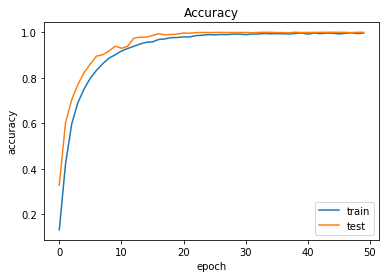

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

test accuracies with test data 

In [23]:
test_label = test['label']
test.drop('label',axis=1,inplace=True)


In [24]:
test_images = test.values
test_images = np.array([np.reshape(i,(28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [25]:
test_labels = label_bin.fit_transform(test_label)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)


In [26]:
test_images.shape
print(test_labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [27]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(test_images)
print(y_pred[100])

acc = accuracy_score(test_labels, y_pred.round())
print(acc)


[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.7954545454545454
